In [1]:
import pandas as pd
df = pd.read_csv('vdjdb.txt', delimiter = '\t')

In [2]:
df = df[df['vdjdb.score']>0]

In [3]:
df = df[df['gene']=='TRB']

In [4]:
df = df.drop_duplicates()

In [5]:
import multiprocessing
import pandas as pd
import pwseqdist as pw
from tcrdist.rep_funcs import _pws, _pw  


# Choose the metrics you want to apply to each CDR
metrics = { 'cdr3' : pw.metrics.nb_vector_tcrdist}

# Choose the weights that are right for you.
weights = { 'cdr3' : 3}

# Provide arguments for the distance metrics 
kargs = {   'cdr3' : {'use_numba': True, 'distance_matrix': pw.matrices.tcr_nb_distance_matrix, 'dist_weight': 1, 'gap_penalty':4, 'ntrim':3, 'ctrim':2, 'fixed_gappos':False}}
            
# Here are your distance matrices
from tcrdist.rep_funcs import _pws

dmats = _pws(df = df,
         metrics = metrics, 
         weights= weights, 
         kargs=kargs, 
         cpu = 1, 
         store = True)

print(dmats['tcrdist'])

[[  0  54  39 ... 144 141 138]
 [ 54   0  15 ... 129 123 114]
 [ 39  15   0 ... 132 123 126]
 ...
 [144 129 132 ...   0  72  57]
 [141 123 123 ...  72   0  63]
 [138 114 126 ...  57  63   0]]


In [6]:
import numpy as np
np.shape(dmats['tcrdist'])

(8452, 8452)

C:\Users\vikra\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vikra\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


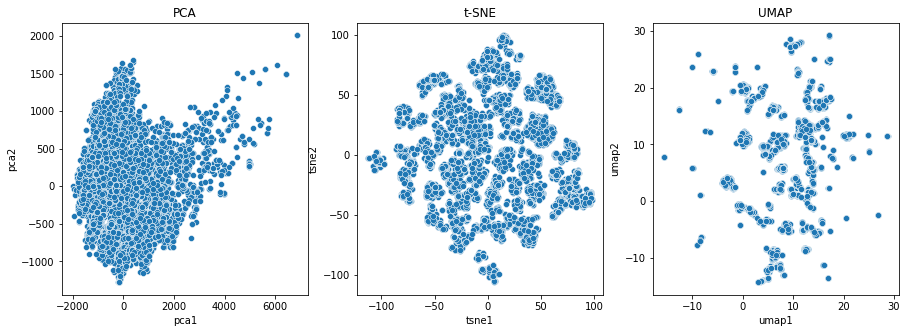

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

tcrdist_matrix = dmats['tcrdist']


pca = PCA(n_components=2)
pca_result = pca.fit_transform(tcrdist_matrix)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]


tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tcrdist_matrix)
df['tsne1'] = tsne_result[:, 0]
df['tsne2'] = tsne_result[:, 1]

umap = UMAP(n_components=2)
umap_result = umap.fit_transform(tcrdist_matrix)
df['umap1'] = umap_result[:, 0]
df['umap2'] = umap_result[:, 1]


plt.figure(figsize=(15, 5))

# PCA plot
plt.subplot(1, 3, 1)
sns.scatterplot(x='pca1', y='pca2',  data=df)
plt.title('PCA')

# t-SNE plot
plt.subplot(1, 3, 2)
sns.scatterplot(x='tsne1', y='tsne2', data=df)
plt.title('t-SNE')

# UMAP plot
plt.subplot(1, 3, 3)
sns.scatterplot(x='umap1', y='umap2', data=df)
plt.title('UMAP')

plt.show()

In [8]:
df = df.sort_values('antigen.epitope')

In [9]:
df.head()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp,pca1,pca2,tsne1,tsne2,umap1,umap2
21255,1513,TRB,CASSQGFGANVLTF,TRBV19*01,TRBJ2-6*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,AAFKRSCLK,...,sort,amplicon,no,no,-168.787476,141.695386,-17.263599,-20.276127,13.200672,10.996577
21257,1514,TRB,CASVSGQGVSPLHF,TRBV19*01,TRBJ1-6*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,AAFKRSCLK,...,sort,amplicon,no,no,564.457853,528.623568,-36.044834,-16.871735,12.383444,9.154242
21259,1515,TRB,CATSRDGAGLVNQPQHF,TRBV15*01,TRBJ1-5*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,AAFKRSCLK,...,sort,amplicon,no,no,2033.718114,-642.729966,61.142365,-50.133480,4.543636,-8.293111
21261,1516,TRB,CASSQDPGSSYNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,AAFKRSCLK,...,sort,amplicon,no,no,521.022328,-818.501493,10.214186,-10.767209,-0.165820,-1.145765
21263,1517,TRB,CASSLNPGRSDSPLHF,TRBV7-6*01,TRBJ2-1*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,AAFKRSCLK,...,sort,amplicon,no,yes,1302.252310,-186.740973,-36.487164,-42.457233,16.946898,2.331032


In [12]:
df.head(50)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp,pca1,pca2,tsne1,tsne2,umap1,umap2,numeric_value
21255,1513,TRB,CASSQGFGANVLTF,TRBV19*01,TRBJ2-6*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,AAFKRSCLK,...,amplicon,no,no,-168.787476,141.695386,-17.263599,-20.276127,13.200672,10.996577,0
21257,1514,TRB,CASVSGQGVSPLHF,TRBV19*01,TRBJ1-6*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,AAFKRSCLK,...,amplicon,no,no,564.457853,528.623568,-36.044834,-16.871735,12.383444,9.154242,0
21259,1515,TRB,CATSRDGAGLVNQPQHF,TRBV15*01,TRBJ1-5*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,AAFKRSCLK,...,amplicon,no,no,2033.718114,-642.729966,61.142365,-50.133480,4.543636,-8.293111,0
21261,1516,TRB,CASSQDPGSSYNEQFF,TRBV4-3*01,TRBJ2-1*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,AAFKRSCLK,...,amplicon,no,no,521.022328,-818.501493,10.214186,-10.767209,-0.165820,-1.145765,0
21263,1517,TRB,CASSLNPGRSDSPLHF,TRBV7-6*01,TRBJ2-1*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,AAFKRSCLK,...,amplicon,no,yes,1302.252310,-186.740973,-36.487164,-42.457233,16.946898,2.331032,0
1670,305,TRB,CASSWSFGTEAFF,TRBV6-4*01,TRBJ1-1*01,HomoSapiens,HLA-A*02:01:48,B2M,MHCI,AAGIGILTV,...,other,no,no,-784.958880,595.087929,-37.508518,42.025803,16.255482,16.545679,1
78385,27072,TRB,CASSLSFGTEAFF,TRBV6-4*01,TRBJ1-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,AAGIGILTV,...,sanger,no,no,-995.205218,437.106588,-37.179688,43.218899,16.259464,16.543587,1
78387,27073,TRB,CAISEVGVGQPQHF,TRBV10-3*01,TRBJ1-5*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,AAGIGILTV,...,sanger,no,no,-489.177369,-684.104933,74.381981,0.419359,5.415235,-1.098612,1
78395,27077,TRB,CASSLSFGTEAFF,TRBV6-4*01,TRBJ1-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,AAGIGILTV,...,amplicon,no,no,-995.205218,437.106588,-37.180218,43.219620,16.258442,16.540180,1
1684,312,TRB,CAWSETGLGMGGWQF,TRBV30*01,TRBJ2-2*01,HomoSapiens,HLA-A*02:01:48,B2M,MHCI,AAGIGILTV,...,other,no,yes,725.132026,210.721887,-47.085690,-33.552109,7.819367,5.389204,1


In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,20), dpi = 1000)
plt.grid(color='white', linestyle='--', linewidth=0.5)

categories = df['antigen.epitope'].astype('category').cat.codes

plt.scatter(df['tsne1'], df['tsne2'], c=categories, cmap='gist_ncar', s=0.1)
plt.title('TCRDist - TSNE - CDR3_Beta - Coloured by Antigen Epitope')
plt.savefig('mini-projc.png', dpi = 1000)